<a href="https://colab.research.google.com/github/gorantlasuhas/git_new/blob/main/Dnnlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the data from the link
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

df.head()



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [22]:
# Drop the rows with classes other than sekar and barbunya
df = df[df['Class'].isin(['SEKER', 'BARBUNYA'])]
df = df.reset_index(drop=True)

df.shape

(3349, 17)

In [24]:
# Set column names
col_names = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
             'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
             'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']
df.columns = col_names

# Normalize the data
for col in df.columns[:-1]:
    max_val = df[col].max()
    min_val = df[col].min()
    df[col] = (df[col] - min_val) / (max_val - min_val)

print(df.head())

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  0.000000   0.000000         0.027028         0.016729      0.186195   
1  0.003871   0.036995         0.000000         0.071982      0.078324   
2  0.011248   0.018438         0.043442         0.029486      0.199724   
3  0.018419   0.047491         0.035432         0.070620      0.139136   
4  0.019926   0.013133         0.004672         0.119109      0.038823   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.517291    0.000000       0.000000  0.618235  0.928536   0.917733   
1      0.301490    0.005090       0.005830  0.718069  0.876908   0.738897   
2      0.537484    0.010860       0.016845  0.688910  0.937910   0.892095   
3      0.437247    0.022376       0.027437  0.711660  0.766328   0.781476   
4      0.179374    0.018957       0.029649  0.663932  0.955711   0.985369   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.7289

In [31]:

# Convert the 'Class' column to numeric type
df['Class'] = pd.factorize(df['Class'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

# Initialize the weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0


In [30]:
print(y_train.shape)

(2344,)


In [29]:
print(y_test.shape)

(1005,)


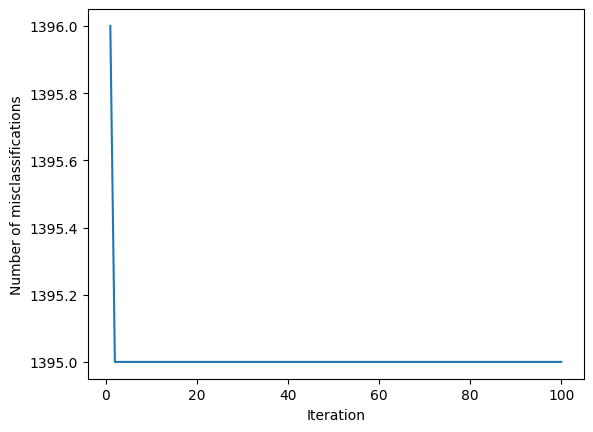

Test error: 0.6288557213930348


In [32]:

# Train the perceptron
misclassifications = []
epochs = 100
for epoch in range(epochs):
    misclassified = 0
    for i, x in X_train.iterrows():
        y = y_train[i]
        y_pred = np.dot(x, weights) + bias
        if y * y_pred <= 0:
            weights += y * x
            bias += y
            misclassified += 1
    misclassifications.append(misclassified)
    if misclassified == 0:
        break

# Plot a graph of number of misclassifications versus the iteration number
plt.plot(range(1, len(misclassifications)+1), misclassifications)
plt.xlabel('Iteration')
plt.ylabel('Number of misclassifications')
plt.show()

# Test the model on the testing set and report the error
y_pred = np.sign(np.dot(X_test, weights) + bias)

error = np.mean(y_pred != y_test)
print('Test error:', error)

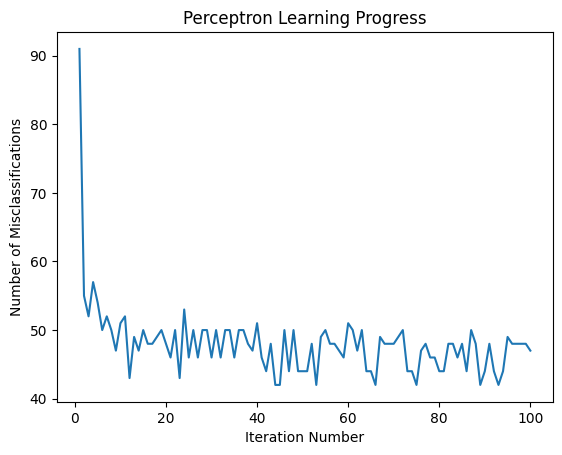

Error rate on the test set: 3.08%


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

path_to_dataset = '/content/Dry_Bean_Dataset.xlsx'
data = pd.read_excel(path_to_dataset)

#Keep only samples from classes Seker and Barbunya
acceptable_classes = ['SEKER', 'BARBUNYA']
data_reduced = data[data['Class'].isin(acceptable_classes)]

#Separate features and classes
features = data_reduced.drop(columns=['Class'])
classes = data_reduced['Class']

#Normalize the features
normalized_features = (features - features.min()) / (features.max() - features.min())

#Combine normalized features and classes back into a new DataFrame
data_normalized = pd.concat([normalized_features, classes], axis=1)

#Split the data into training and testing sets
train_data, test_data, train_classes, test_classes = train_test_split(normalized_features, classes,
                                                                      test_size=0.3, random_state=42)

#Perceptron training with a fixed number of iterations (100 in this case)
num_iterations = 100
misclassifications = []

#Initialize weights randomly
weights = np.random.randn(train_data.shape[1])

for iteration in range(num_iterations):
    num_misclassifications = 0
    for i in range(train_data.shape[0]):
        x = train_data.iloc[i].values
        y_true = 1 if train_classes.iloc[i] == 'SEKER' else -1

        if y_true * np.dot(weights, x) <= 0:
            weights = weights + y_true * x
            num_misclassifications += 1

    misclassifications.append(num_misclassifications)

#Plot the number of misclassifications during training
plt.plot(range(1, num_iterations + 1), misclassifications)
plt.xlabel('Iteration Number')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Learning Progress')
plt.show()

#Test the model on the test set
num_test_samples = test_data.shape[0]
num_test_misclassifications = 0

for i in range(num_test_samples):
    x = test_data.iloc[i].values
    y_true = 1 if test_classes.iloc[i] == 'SEKER' else -1

    if y_true * np.dot(weights, x) <= 0:
        num_test_misclassifications += 1

#Calculate the error rate on the test set
error_rate = num_test_misclassifications / num_test_samples
print(f"Error rate on the test set: {error_rate:.2%}")